In [1]:
import os
from datetime import datetime
import gdown
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r"C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Horse_race\combined_data\Horserace_ML.csv")

In [3]:
df.columns

Index(['age', 'trainerName', 'jockeyName', 'course', 'weight', 'TR', 'isFav',
       'runners', 'res_place', 'position', 'distance_in_miles'],
      dtype='object')

In [4]:
#Splitting to keep the test set aside 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
train_subset = train_set.sample(n=150000, random_state=42)

In [6]:
df2 = train_subset.copy()

# Evaluation Function

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

In [8]:
# Define features and target variable for the subset
X_subset = df2.drop(columns=['position'])
y_subset = df2['position']

# Splitting the subset data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)


In [9]:
# Label Encoding for categorical features
categorical_columns = ['trainerName', 'jockeyName','course']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

#  Standard Scaling for numerical features
numerical_columns = ['age','weight','TR','runners', 'distance_in_miles'] 
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


# Label Encoding for target in the subset
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

In [10]:
#  Apply SMOTE to handle class imbalance (if needed)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [11]:
#Recursive Feature Elimination (RFE)
base_model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=8, step=1)
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected features by RFE
selected_features = X_train.columns[rfe.support_].tolist()
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: ['age', 'trainerName', 'course', 'weight', 'TR', 'runners', 'res_place', 'distance_in_miles']


In [12]:
# Selecting features for training from balanced data
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test[selected_features]


Decision Tree Regressor:
Mean Squared Error: 8.201562284966004
Mean Absolute Error: 2.0963236365324693
R2 Score: 0.6000032351260612


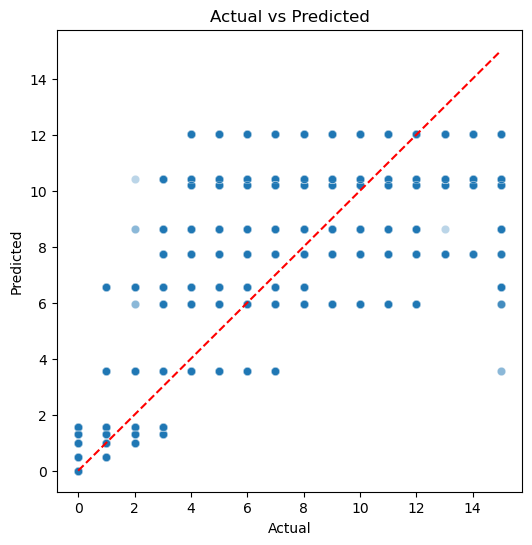

In [13]:
print("\nDecision Tree Regressor:")
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
evaluate_model(dt_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)



Random Forest Regressor:
Mean Squared Error: 7.001961442037972
Mean Absolute Error: 1.9215913716107316
R2 Score: 0.6585087295232487


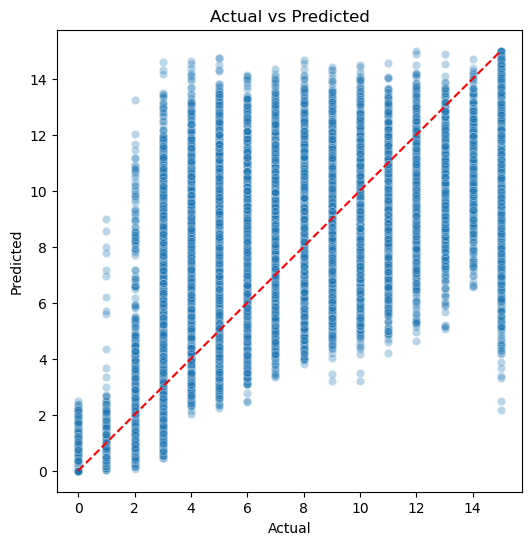

In [14]:
# Random Forest Regressor
print("\nRandom Forest Regressor:")
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
evaluate_model(rf_regressor, X_train_selected, X_test_selected,  y_train_balanced, y_test_encoded)


Gradient Boosting Regressor:
Mean Squared Error: 6.7909157459815965
Mean Absolute Error: 1.926063789460624
R2 Score: 0.6688015972391791


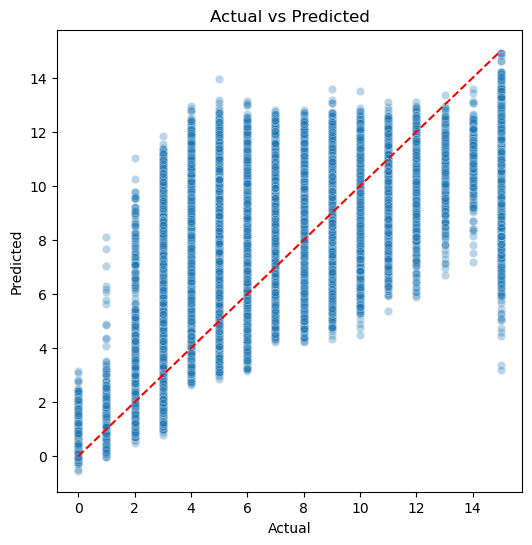

In [15]:
# Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
gb_regressor = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)



XGBoost Regressor:
Mean Squared Error: 6.516102824288712
Mean Absolute Error: 1.8885555747779204
R2 Score: 0.6822044436486012


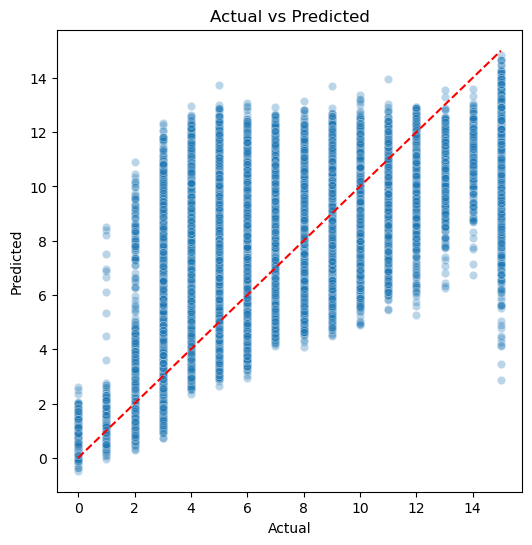

In [16]:
# XGBoost Regressor
print("\nXGBoost Regressor:")
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
evaluate_model(xgb_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)



K-Nearest Neighbors Regressor:
Mean Squared Error: 12.4347
Mean Absolute Error: 2.7244733333333335
R2 Score: 0.3935497165832249


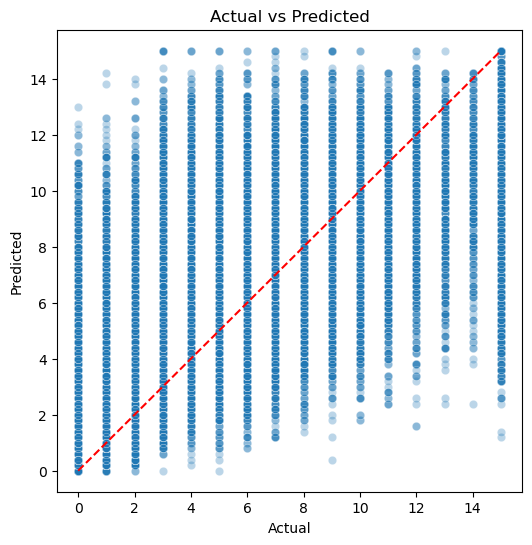

In [17]:

# K-Nearest Neighbors Regressor
print("\nK-Nearest Neighbors Regressor:")
knn_regressor = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)



LightGBM Regressor:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1669
[LightGBM] [Info] Number of data points in the train set: 187840, number of used features: 8
[LightGBM] [Info] Start training from score 7.500000
Mean Squared Error: 6.401293941588339
Mean Absolute Error: 1.871748352734745
R2 Score: 0.6878037648587957


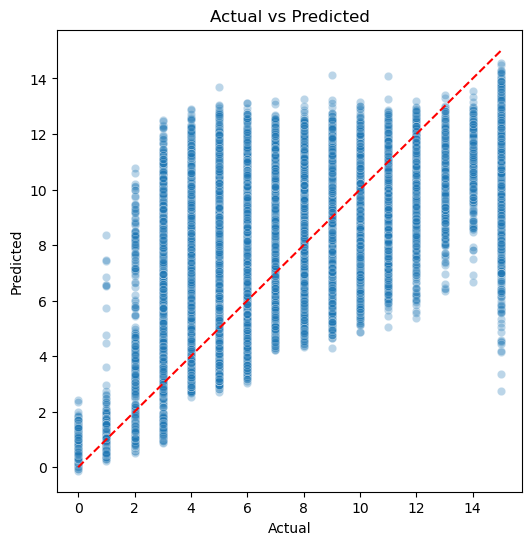

In [18]:
# LightGBM Regressor
print("\nLightGBM Regressor:")
lgb_regressor = LGBMRegressor(random_state=42)
evaluate_model(lgb_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)




CatBoost Regressor:
Mean Squared Error: 6.276027613806538
Mean Absolute Error: 1.849357646192896
R2 Score: 0.6939131040455755


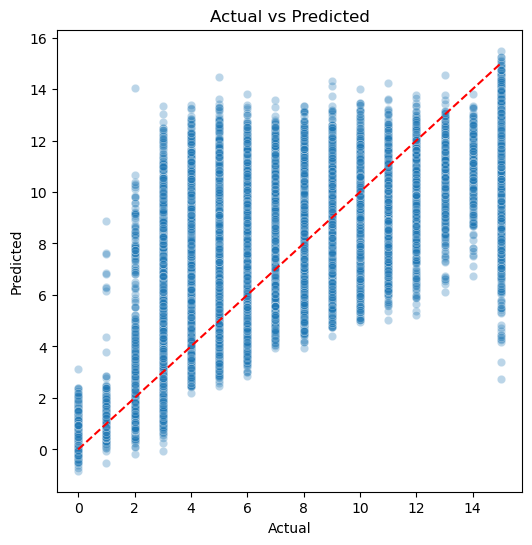

In [19]:
# CatBoost Regressor
print("\nCatBoost Regressor:")
cat_regressor = CatBoostRegressor(random_state=42, verbose=0)
evaluate_model(cat_regressor, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for CatBoost: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 8, 'border_count': 200}
Mean Squared Error: 6.905452532208913
Mean Absolute Error: 1.96893058352985
R2 Score: 0.6632155463920173


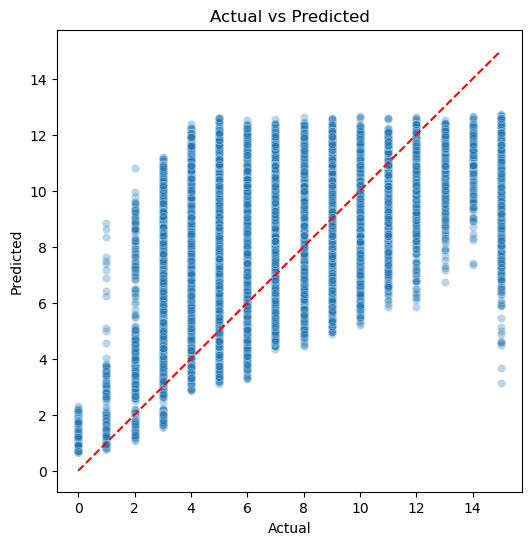

In [21]:


# Define the parameter grid for CatBoost
param_grid_catboost = {
    'iterations': [100, 200, 300, 400, 500],
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 50, 100, 200]
}

# Initialize the CatBoost Regressor
catboost_regressor = CatBoostRegressor(loss_function='RMSE', random_seed=42, silent=True)

# Initialize RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_regressor,
    param_distributions=param_grid_catboost,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_catboost.fit(X_train_selected, y_train_balanced)

# Best parameters
print("Best Parameters for CatBoost:", random_search_catboost.best_params_)

# Best estimator
best_catboost_model = random_search_catboost.best_estimator_

# Evaluate the best CatBoost model
evaluate_model(best_catboost_model, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\a

Best Parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'learning_rate': 0.05}


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\a

Mean Squared Error: 6.793948162987163
Mean Absolute Error: 1.9294096335117652
R2 Score: 0.668653703831822


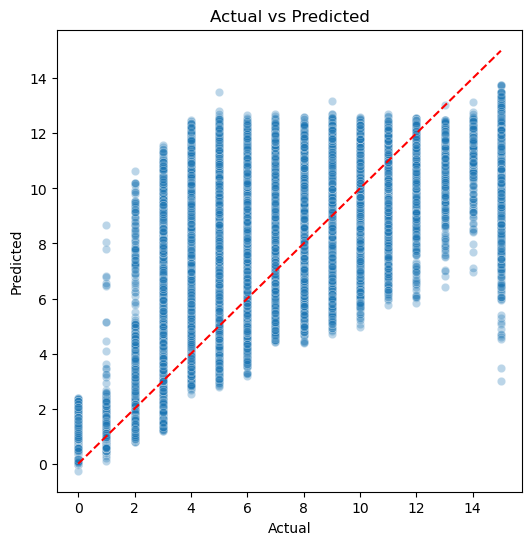

In [22]:

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=gb_regressor,
    param_distributions=param_grid_gb,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_gb.fit(X_train_selected, y_train_balanced)

# Best parameters
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

# Best estimator
best_gb_model = random_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model
evaluate_model(best_gb_model, X_train_selected, X_test_selected, y_train_balanced, y_test_encoded)


In [23]:
best_gb_model 

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_split=10, random_state=42)

# Training Full data

In [24]:
# Define features and target variable for the full train set
X_train_full = train_set.drop(columns=['position'])
y_train_full = train_set['position']

# Initialize encoders
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train_full[col] = label_encoders[col].fit_transform(X_train_full[col])



In [25]:
# Standard Scaling for numerical features
scaler = StandardScaler()
X_train_full[numerical_columns] = scaler.fit_transform(X_train_full[numerical_columns])

# Label Encoding for target variable
label_encoder_y = LabelEncoder()
y_train_full_encoded = label_encoder_y.fit_transform(y_train_full)



In [26]:
# Apply SMOTE to handle class imbalance (if needed)
smote = SMOTE(random_state=42)
X_train_full_balanced, y_train_full_balanced = smote.fit_resample(X_train_full, y_train_full_encoded)



In [27]:
# Feature selection with RFE using the full balanced dataset
base_model = XGBRegressor(random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=8, step=1)
rfe.fit(X_train_full_balanced, y_train_full_balanced)

# Get selected features by RFE
selected_features_full = X_train_full.columns[rfe.support_].tolist()
X_train_selected_full = X_train_full_balanced[selected_features_full]


In [28]:
# Retrieve best estimator from RandomizedSearchCV
best_gb_model = random_search_gb.best_estimator_

# Train the best XGBRegressor model on the full balanced dataset
best_gb_model.fit(X_train_selected_full, y_train_full_balanced)

C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\igomp\a

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_split=10, random_state=42)

In [29]:
# Prepare test set for evaluation
X_test = test_set.drop(columns=['position'])
y_test = test_set['position']

# Transform categorical features in X_test using fitted encoders
for col in categorical_columns:
    X_test[col] = label_encoders[col].transform(X_test[col])

# Standard Scaling for numerical features on test set
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Selecting features for test set from balanced data
X_test_selected = X_test[selected_features_full]

# Evaluate the best XGBRegressor model on the test set
y_pred = best_gb_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Optionally, you can also print the selected features by RFE
print("Selected Features by RFE:", selected_features_full)

Mean Squared Error: 7.347542683238246
Mean Absolute Error: 2.0527365150244354
R2 Score: 0.6451008692945961
Selected Features by RFE: ['age', 'course', 'weight', 'TR', 'isFav', 'runners', 'res_place', 'distance_in_miles']
